In [20]:
function compute_Tk(A,q,kmax)
    T = zeros(kmax, kmax)
    r = copy(q[:,1])
    q[:,1] = r / norm(r)
    
    for k = 1:kmax
        if k > 1
            q[:,k] = r / T[k,k-1]
        end

        r = A * q[:,k] # Multiply by A
        for i=1:k
            # Make vector orthogonal
            T[i,k] = dot(q[:,i], r)
            r -= T[i,k] * q[:,i]
        end

        if k<kmax
            T[k+1,k] = norm(r)
        end
    end
    return T
end

function eig_k(T,k)
    Tk = T[1:k,1:k]
    L, = eig(Tk) # Eigenvalue estimates at step k        
    return L    
end

eig_k (generic function with 1 method)

In [21]:
n = 32
srand(2016)

Q, = qr(rand(n,n))
D = linspace(-1,1,n).^3

A = Q * diagm(D) * Q'

kmax = n # Size of Arnoldi space

q = zeros(n,kmax)
# Random starting vector
q[:,1] = rand(n)
q[:,1] /= norm(q[:,1])

Tk = compute_Tk(A,q,kmax);

In [22]:
# Testing accuracy
D, = eig(A); D1, = eig(Tk)
sort!(D); sort!(D1)
@show norm(D-D1) / norm(D)

norm(D - D1) / norm(D) = 2.675480447925403e-15


2.675480447925403e-15

In [23]:
using Plots
plotlyjs()

L = zeros(n,kmax)
for k=1:kmax
    x = eig_k(Tk,k)
    sort!(x)
    for l=1:k
        if l%2 == 1
            L[l,k] = x[(l+1)>>1]
        else
            L[l,k] = x[k-(l-2)>>1]
        end
    end
end

plot(1:kmax,L[1,:]',left_margin=20mm)
for k=2:kmax-1
    plot!(k:kmax,L[k,k:end]')
end
plot!([kmax],[L[kmax,kmax]])

scatter!(kmax*ones(n),D,markersize=2)
xaxis!("Iteration")
yaxis!("Eigenvalue estimates")

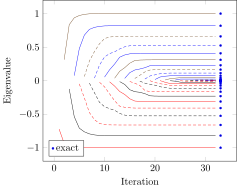

In [24]:
generate_tex_pgfplot = true 
if generate_tex_pgfplot
    @eval import PGFPlots
    tr = [ PGFPlots.Plots.Scatter((1+kmax)*ones(n),D,legendentry="exact",markSize=1) ]
    for k=1:kmax
        push!(tr, PGFPlots.Plots.Linear(k:kmax,vec(L[k,k:end]),mark="none") )
    end

    ax = PGFPlots.Axis(tr, xlabel="Iteration", ylabel="Eigenvalue",
        legendPos="south west")    
end

In [25]:
if generate_tex_pgfplot
    PGFPlots.save("Lanczos_CRO.tex", ax, include_preamble=false)
end